In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df=pd.read_excel('practice_data.xlsx')
df.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


# feature encoding

In [54]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['encoded_feature']=encoder.fit_transform(df['gender'])
df.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,encoded_feature
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No,1
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes,0
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No,1
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No,1
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes,0


In [24]:
first_row=df.iloc[0]
print(first_row)

EmployeeID                           1
gender                            Male
department                       Sales
Days Present                        20
Accuracy of Work                  High
Meeting Project Deadlines          Yes
Task Completion Rates               85
Interpersonal Skills Rating          8
Decision-Making Skills Rating        7
Sales Revenue Generated          51638
churned                             No
encoded_feature                      1
Name: 0, dtype: object


In [30]:
print('The first value of the gender column is :',df.gender[0])

The first value of gender column is : Male


# selecting features

In [23]:
import pandas as pd

# Sample dataset
data = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'age': [25, 40, 35, 50, 28],
    'monthly_spend': [200, 150, 300, 100, 250],
    'contract_type': ['A', 'B', 'A', 'B', 'A'],
    'churn': [1, 0, 1, 0, 1]
})


# Dropping irrelevant columns like customer ID
x = data.drop(['customer_id', 'churn'], axis=1)  # Feature matrix
y = data['churn']  # Target variable


print(x)

   age  monthly_spend contract_type
0   25            200             A
1   40            150             B
2   35            300             A
3   50            100             B
4   28            250             A


# standard scaling

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sample feature set
features = np.array([[10, 200], [15, 180], [12, 250], [20, 300]])

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_features = scaler.fit_transform(features)

print(scaled_features)

[[-1.12832963 -0.69787657]
 [ 0.19911699 -1.12733907]
 [-0.59735098  0.37577969]
 [ 1.52656362  1.44943594]]


# MinMaxScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=scaler.fit_transform(features)
print(scaled)


[[0.5  0.5 ]
 [0.   0.  ]
 [1.   1.  ]
 [0.75 0.75]]


# PCA plots

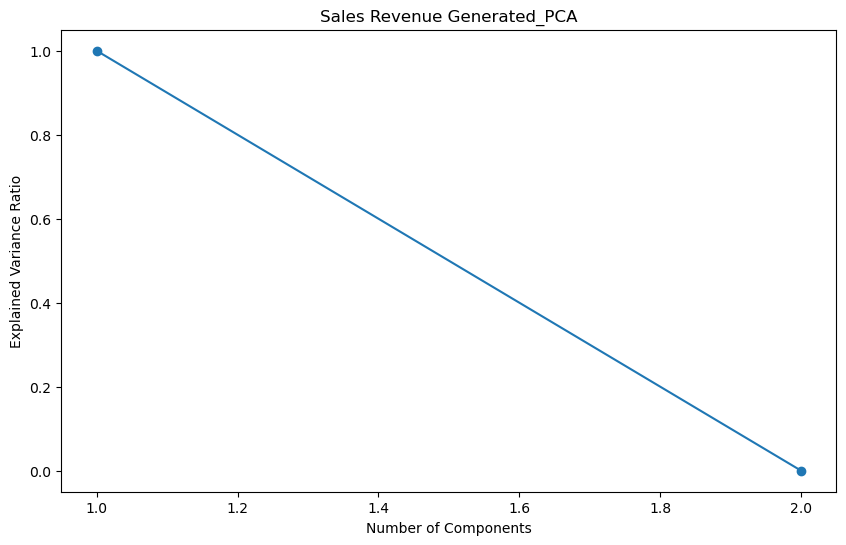

In [78]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Apply PCA
pca = PCA()
temp_pca=pca.fit_transform(df[['Sales Revenue Generated','Task Completion Rates']])

# Explained variance ratio
evr = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(evr) + 1), evr, marker='o', linestyle='-')
plt.title('Sales Revenue Generated_PCA')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Variable ratio

In [33]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
num_val = 2  
pca = PCA(n_components=num_val)
x_pca = pca.fit_transform(scaled_data)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Transformed Data (PCA):\n", x_pca)


Explained Variance Ratio: [0.74007103 0.25112078]
Transformed Data (PCA):
 [[-0.07219519  0.33987877]
 [-2.58964552 -0.70987509]
 [ 2.56790145 -1.29082708]
 [-0.81657374  0.00652649]
 [ 0.91051301  1.65429691]]


In [81]:
df.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,encoded_feature
0,1,Male,Sales,20,High,Yes,0.854965,8,7,-23477.741935,No,1
1,2,Female,Marketing,22,Medium,Yes,1.407129,7,6,22681.258065,Yes,0
2,3,Male,Human Resources,25,High,No,0.302800,9,8,20225.258065,No,1
3,4,Male,Engineering,19,Low,Yes,-0.249365,6,5,16690.258065,No,1
4,5,Female,Finance,23,Medium,Yes,0.854965,7,7,-10868.741935,Yes,0


# MinMaxScaler

In [58]:
scaler=MinMaxScaler()
df['Task Completion Rates']=scaler.fit_transform(df[['Task Completion Rates']])
df['Task Completion Rates']


0     0.714286
1     0.857143
2     0.571429
3     0.428571
4     0.714286
5     1.000000
6     0.285714
7     0.571429
8     0.857143
9     0.714286
10    0.428571
11    0.285714
12    0.571429
13    0.857143
14    0.142857
15    0.428571
16    0.714286
17    0.571429
18    0.285714
19    0.142857
20    0.428571
21    0.714286
22    0.000000
23    0.285714
24    0.571429
25    0.142857
26    0.428571
27    0.714286
28    0.000000
29    0.285714
30    0.571429
Name: Task Completion Rates, dtype: float64

# Standard Scaler

In [60]:
scaler=StandardScaler()
df['Task Completion Rates']=scaler.fit_transform(df[['Task Completion Rates']])
df['Task Completion Rates']

0     0.854965
1     1.407129
2     0.302800
3    -0.249365
4     0.854965
5     1.959294
6    -0.801529
7     0.302800
8     1.407129
9     0.854965
10   -0.249365
11   -0.801529
12    0.302800
13    1.407129
14   -1.353694
15   -0.249365
16    0.854965
17    0.302800
18   -0.801529
19   -1.353694
20   -0.249365
21    0.854965
22   -1.905859
23   -0.801529
24    0.302800
25   -1.353694
26   -0.249365
27    0.854965
28   -1.905859
29   -0.801529
30    0.302800
Name: Task Completion Rates, dtype: float64

# train test split

In [68]:
import random 
import numpy as np
from sklearn.model_selection import train_test_split

In [74]:
a=np.random.rand(100,1)
y=np.random.randint(11,50,100)
x_train, x_test, y_train, y_test = train_test_split(a, y, test_size=0.2, random_state=42)
print(x_train)

[[0.4605025 ]
 [0.06858617]
 [0.78207866]
 [0.22262036]
 [0.5982645 ]
 [0.1455262 ]
 [0.0727535 ]
 [0.26088628]
 [0.32610895]
 [0.66624734]
 [0.20902693]
 [0.55115263]
 [0.65182119]
 [0.93510982]
 [0.65499821]
 [0.06675774]
 [0.58400018]
 [0.21697407]
 [0.31881086]
 [0.43088903]
 [0.16623658]
 [0.55485393]
 [0.14790595]
 [0.92124989]
 [0.17255983]
 [0.05651599]
 [0.05069672]
 [0.74387124]
 [0.53676121]
 [0.06580523]
 [0.3753391 ]
 [0.42772446]
 [0.64701788]
 [0.11355494]
 [0.18223046]
 [0.957305  ]
 [0.04656984]
 [0.61027778]
 [0.93531598]
 [0.13332039]
 [0.84196559]
 [0.32586467]
 [0.85972686]
 [0.82714133]
 [0.37237205]
 [0.77635906]
 [0.95891325]
 [0.19467568]
 [0.45222877]
 [0.7517628 ]
 [0.54536903]
 [0.38699144]
 [0.83181546]
 [0.29921224]
 [0.35253827]
 [0.58137854]
 [0.84749773]
 [0.21584464]
 [0.08374181]
 [0.55017845]
 [0.28001549]
 [0.34428969]
 [0.4727713 ]
 [0.45057086]
 [0.06945771]
 [0.41871624]
 [0.61810871]
 [0.56868899]
 [0.41791568]
 [0.52524692]
 [0.39371021]
 [0.72